In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

# Brazilian Houses To Rent 

# Columns
- id
- city: City where the property is located
- area:Area do imovel / Property area
- rooms:Numero de quartos/ Quantity of rooms
- bathroom:Numero de banheiros / Quantity of bathroom
- parking spaces:Numero de vagas / Quantity of parking spaces
- floor:Andar / Floor
- animal:Aceita animais? / Acept animals?
- furniture: Mobilhada? / Furniture?
- hoa: Valor do condominio / Homeowners association tax
- rent amount: Valor do Aluguel / Rent amount
- property tax: IPTU / Property tax
- fire insurance: Seguro Incendio / Fire Insurance
- total: Valor total / Total

In [7]:
df = pd.read_csv('houses_to_rent_v2.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [8]:
df.shape

(10692, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [10]:
df.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [11]:
df["floor"] = df["floor"].apply(str.strip).replace("-", np.nan)
df["floor"] = pd.to_numeric(df["floor"], downcast="float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  8231 non-null float32
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: float32(1), int64(9), object(3)
memory usage: 1.0+ MB


# Missing Value 

In [13]:
df.isnull().sum()*100/df.shape[0]

city                    0.000000
area                    0.000000
rooms                   0.000000
bathroom                0.000000
parking spaces          0.000000
floor                  23.017209
animal                  0.000000
furniture               0.000000
hoa (R$)                0.000000
rent amount (R$)        0.000000
property tax (R$)       0.000000
fire insurance (R$)     0.000000
total (R$)              0.000000
dtype: float64

In [14]:
df["floor"].interpolate(method ='linear', limit_direction ='forward',inplace=True)

In [15]:
df.isnull().sum()*100/df.shape[0]

city                   0.0
area                   0.0
rooms                  0.0
bathroom               0.0
parking spaces         0.0
floor                  0.0
animal                 0.0
furniture              0.0
hoa (R$)               0.0
rent amount (R$)       0.0
property tax (R$)      0.0
fire insurance (R$)    0.0
total (R$)             0.0
dtype: float64

# Outliner Values

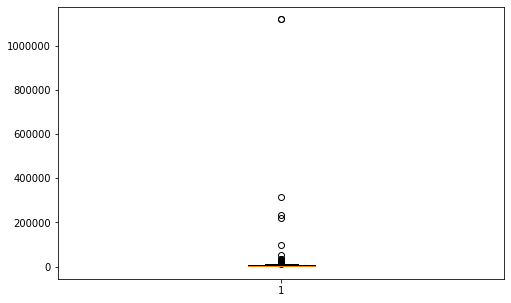

In [16]:
plt.figure(figsize=(8,5))
plt.boxplot(df['total (R$)'])
plt.show()

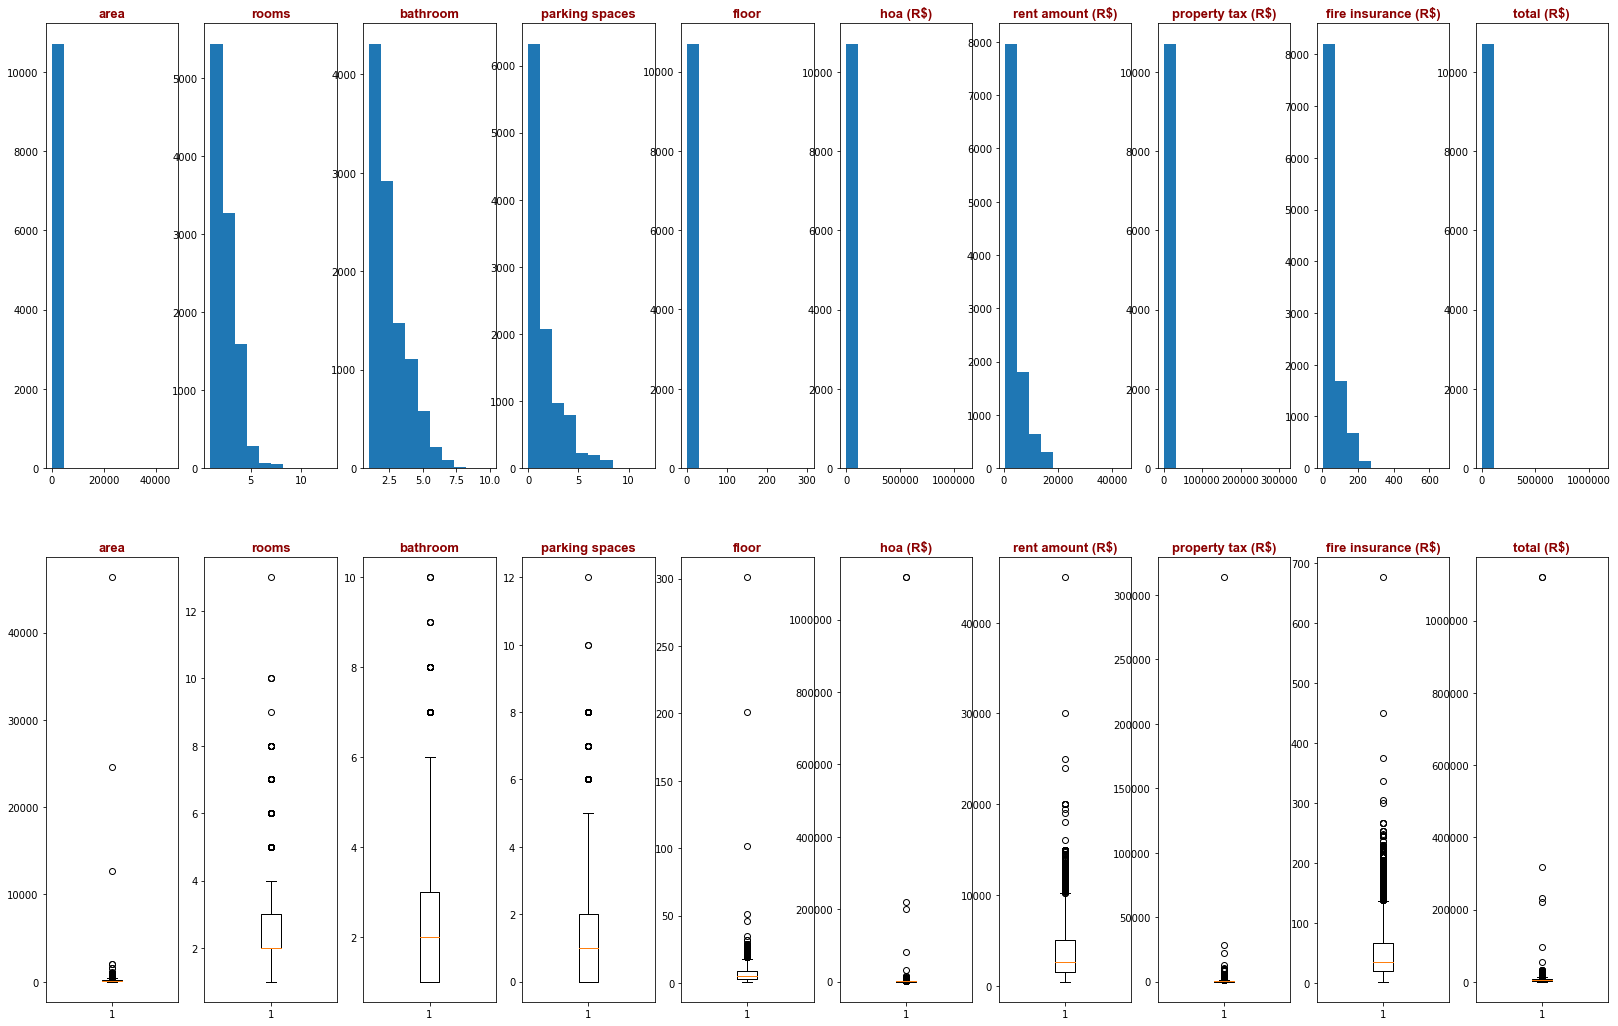

In [17]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
curve_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(28,18))
columns=[ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
         'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
    
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.hist(df[columns[i]])
    plt.title(columns[i] , fontdict=title_font)
for i in range(10):
    plt.subplot(2, 10, i+11)
    plt.boxplot(df[columns[i]])
    plt.title(columns[i]  , fontdict=title_font)

# Logarithm Expressive Outliner Values

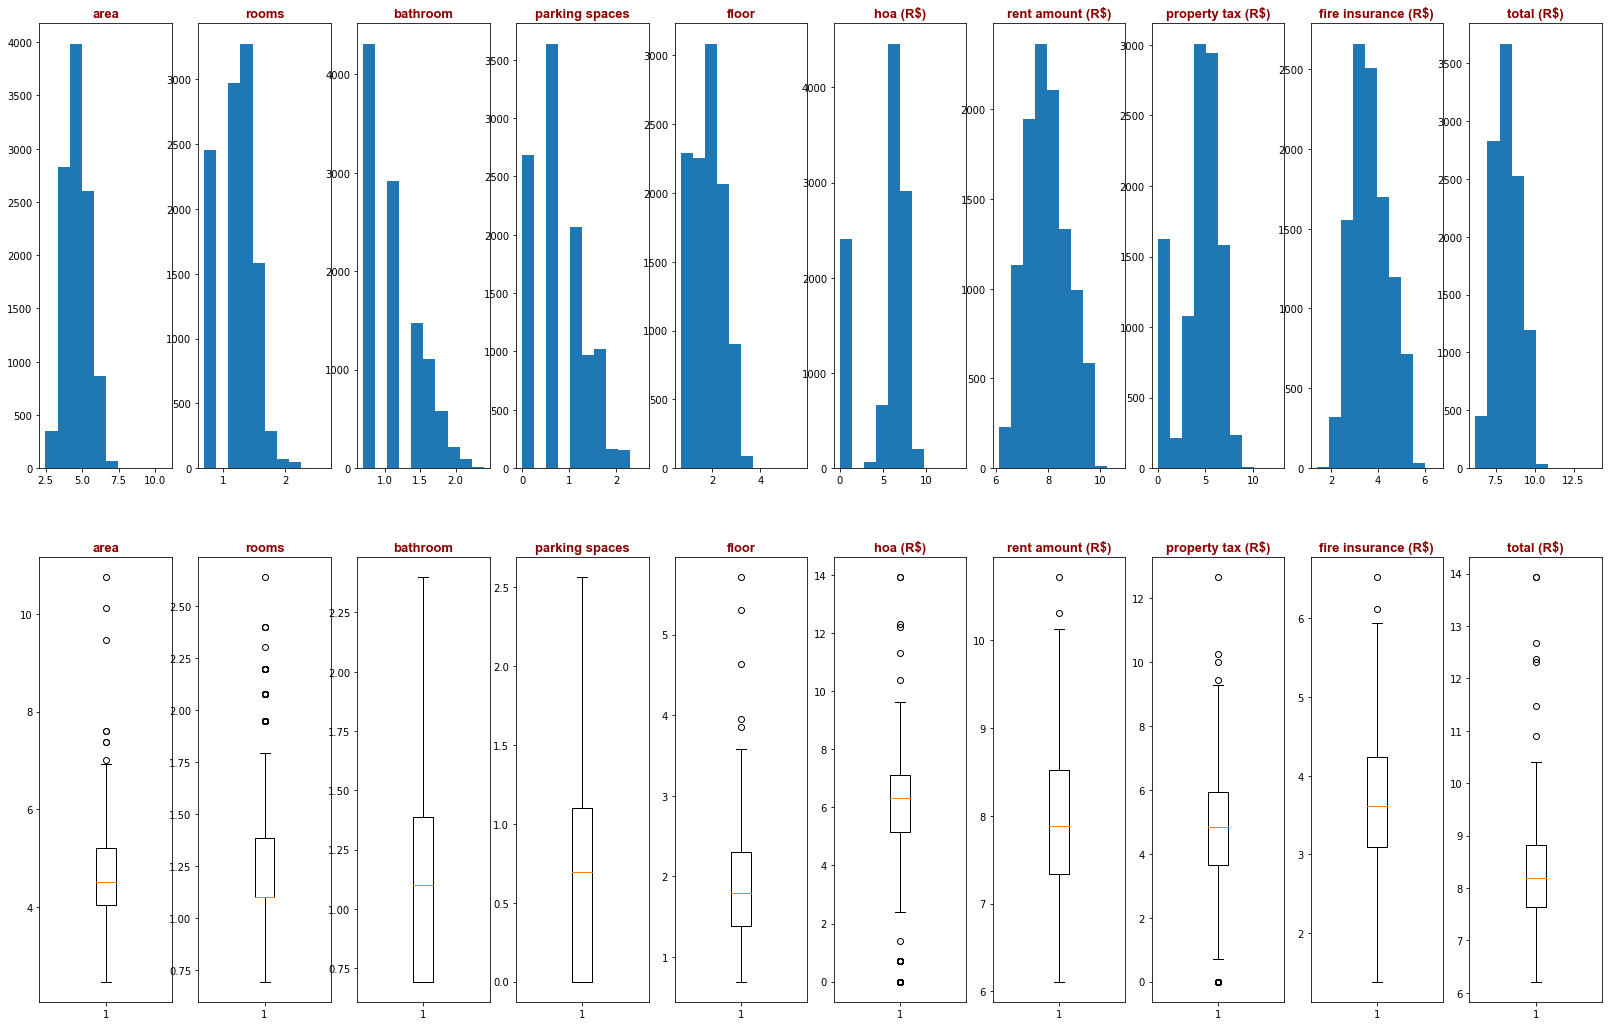

In [18]:
plt.figure(figsize=(28,18))
columns=[ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
         'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
    
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.hist(np.log(df[columns[i]]+1))
    plt.title(columns[i] , fontdict=title_font)
for i in range(10):
    plt.subplot(2, 10, i+11)
    plt.boxplot(np.log(df[columns[i]]+1))
    plt.title(columns[i]  , fontdict=title_font)

# IQR Method

In [19]:
log_threshold_variables= pd.DataFrame()
variables = [ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
         'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
for j in variables:
    for threshold_worth in np.arange(1,5,1):
        q75_log, q25_log = np.percentile(np.log(df[j]), [75 ,25])
        caa_log = q75_log - q25_log
        q75, q25 = np.percentile(df[j], [75 ,25])
        caa= q75 - q25
        min_worth_log = q25_log - (caa_log*threshold_worth) 
        max_worth_log = q75_log + (caa_log*threshold_worth)
        min_worth= q25 - (caa*threshold_worth) #logarithm expression
        max_worth = q75 + (caa*threshold_worth) #logarithm expression
        number_of_outliers_log = len((np.where((np.log(df[j]) > max_worth_log)| 
                                               (np.log(df[j]) < min_worth_log))[0]))
        number_of_outliers = len((np.where((df[j] > max_worth)| 
                                               (df[j] < min_worth))[0]))
        log_threshold_variables = log_threshold_variables.append({'threshold_worth': threshold_worth,
                                                            'number_of_outliers' : number_of_outliers, #logarithm expression
                                                            'number_of_outliers_log': number_of_outliers_log 
                                                            }, ignore_index=True)
    print("-"*10,"",j,"-"*10)
    display(log_threshold_variables)
    log_threshold_variables = pd.DataFrame()

----------  area ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,1038.0,208.0,1.0
1,418.0,5.0,2.0
2,180.0,3.0,3.0
3,96.0,2.0,4.0


----------  rooms ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,408.0,2862.0,1.0
1,120.0,52.0,2.0
2,52.0,1.0,3.0
3,16.0,0.0,4.0


----------  bathroom ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,318.0,3.0,1.0
1,18.0,0.0,2.0
2,3.0,0.0,3.0
3,0.0,0.0,4.0


----------  parking spaces ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,552.0,0.0,1.0
1,159.0,0.0,2.0
2,3.0,0.0,3.0
3,1.0,0.0,4.0


----------  floor ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,621.0,19.0,1.0
1,142.0,3.0,2.0
2,19.0,1.0,3.0
3,6.0,0.0,4.0


----------  hoa (R$) ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,1085.0,2424.0,1.0
1,446.0,2409.0,2.0
2,174.0,2375.0,3.0
3,80.0,2373.0,4.0


----------  rent amount (R$) ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,1191.0,14.0,1.0
1,569.0,0.0,2.0
2,13.0,0.0,3.0
3,11.0,0.0,4.0


----------  property tax (R$) ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,1414.0,1683.0,1.0
1,842.0,1597.0,2.0
2,520.0,1596.0,3.0
3,331.0,1596.0,4.0


----------  fire insurance (R$) ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,1189.0,134.0,1.0
1,514.0,0.0,2.0
2,143.0,0.0,3.0
3,10.0,0.0,4.0


----------  total (R$) ----------


,number_of_outliers,number_of_outliers_log,threshold_worth
0,1100.0,76.0,1.0
1,413.0,6.0,2.0
2,92.0,3.0,3.0
3,23.0,2.0,4.0


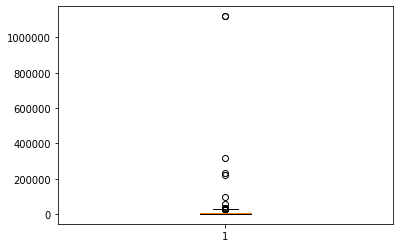

In [20]:
plt.boxplot(df['total (R$)'], whis=4)
plt.show()

# Arrange Whis Values 

In [21]:
q1 = df['total (R$)'].quantile(0.25)
q3 = df['total (R$)'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+4*iqr #acceptable range
low,high

(-4997.625, 25593.0)

In [22]:
df['total (R$)']=np.where(df['total (R$)'] > high,high,df['total (R$)']) # upper limit

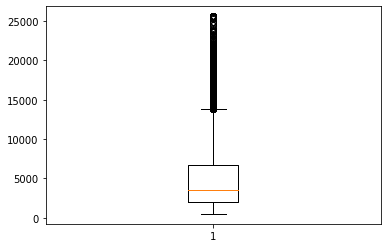

In [23]:
plt.boxplot(df['total (R$)'])
plt.show()

# Target Variable Log Expression with data

In [35]:
df= np.log(df) # log expression 

q1 = df['total (R$)'].quantile(0.25)
q3 = df['total (R$)'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+4*iqr #acceptable range
low,high

(1.815122775575988, 2.756048895403505)

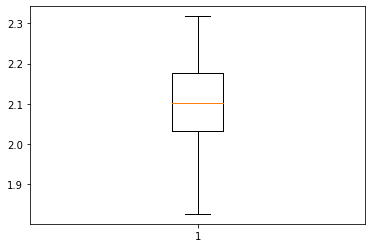

In [37]:
df['total (R$)']=np.where(df['total (R$)'] > high,high,df['total (R$)']) # upper limit

plt.boxplot(df['total (R$)'])
plt.show()

# From Categorical Variable To Numerical Variable

In [24]:
df["city"]= df["city"].replace({"São Paulo":0, 'Porto Alegre':1, 'Rio de Janeiro':2, 'Campinas':3,
       'Belo Horizonte':4})
df['animal']= pd.get_dummies(df['animal'],drop_first=True)
df['furniture']= pd.get_dummies(df['furniture'],drop_first=True)

In [25]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,70,2,1,1,7.0,0,0,2065,3300,211,42,5618.0
1,0,320,4,4,0,20.0,0,1,1200,4960,1750,63,7973.0
2,1,80,1,1,1,6.0,0,1,1000,2800,0,41,3841.0
3,1,51,2,1,0,2.0,0,1,270,1112,22,17,1421.0
4,0,25,1,1,0,1.0,1,1,0,800,25,11,836.0


# Correlation

In [26]:
df_corr=df.corr()
df_corr

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,1.000000,0.009334,0.054564,-0.089320,-0.068015,-0.122921,-0.008014,0.106381,0.013775,-0.170962,-0.034662,-0.142254,-0.188998
area,0.009334,1.000000,0.193796,0.226766,0.193983,0.027297,-0.039626,-0.008175,0.006890,0.180742,0.039059,0.188078,0.187955
rooms,0.054564,0.193796,1.000000,0.733763,0.617510,0.041730,-0.172190,0.080694,0.007139,0.541758,0.075252,0.565148,0.547857
bathroom,-0.089320,0.226766,0.733763,1.000000,0.697379,0.111535,-0.118255,-0.017938,0.050271,0.668504,0.109253,0.676399,0.695338
parking spaces,-0.068015,0.193983,0.617510,0.697379,1.000000,0.108815,-0.127432,0.004720,0.009321,0.578361,0.098378,0.597348,0.586738
floor,-0.122921,0.027297,0.041730,0.111535,0.108815,1.000000,-0.000552,-0.046840,0.003026,0.152717,0.019911,0.137007,0.163791
animal,-0.008014,-0.039626,-0.172190,-0.118255,-0.127432,-0.000552,1.000000,-0.087972,0.022008,-0.067754,0.003006,-0.079152,-0.064660
furniture,0.106381,-0.008175,0.080694,-0.017938,0.004720,-0.046840,-0.087972,1.000000,-0.003413,-0.164235,-0.000985,-0.141768,-0.161952
hoa (R$),0.013775,0.006890,0.007139,0.050271,0.009321,0.003026,0.022008,-0.003413,1.000000,0.036490,0.007627,0.029535,0.122887
rent amount (R$),-0.170962,0.180742,0.541758,0.668504,0.578361,0.152717,-0.067754,-0.164235,0.036490,1.000000,0.107884,0.987343,0.951123


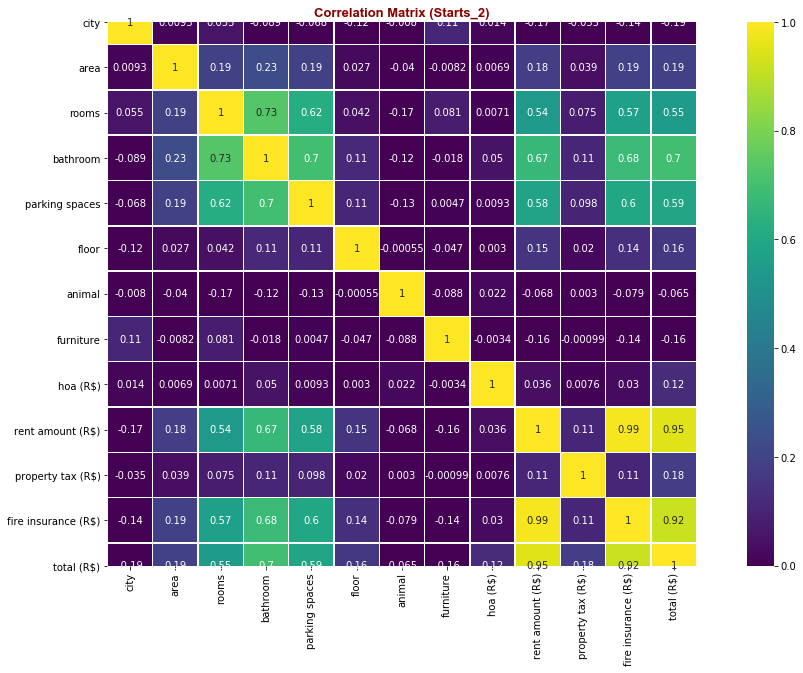

In [27]:
plt.figure(figsize=(18,10))
sns.heatmap(df_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Starts_2)", fontdict=title_font)

plt.show()

In [28]:
df_corr['total (R$)']

city                  -0.188998
area                   0.187955
rooms                  0.547857
bathroom               0.695338
parking spaces         0.586738
floor                  0.163791
animal                -0.064660
furniture             -0.161952
hoa (R$)               0.122887
rent amount (R$)       0.951123
property tax (R$)      0.182937
fire insurance (R$)    0.918820
total (R$)             1.000000
Name: total (R$), dtype: float64

# Machine Learning

### This model QIR*4 (total) 
### (model 1) 

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error ,r2_score,explained_variance_score,max_error
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict,GridSearchCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
X = df.drop(["total (R$)"], axis=1)
y = df['total (R$)']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 40 )

X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total (R$)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:45:11   Log-Likelihood:                -71690.
No. Observations:                8553   AIC:                         1.434e+05
Df Residuals:                    8540   BIC:                         1.435e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -202.9870     38.837     -5.227      0.000    -279.116    -126.858
city                  -31.4611      8.365     -3.761      0.000     -47.859     -15.063
area                    0.0659      0.020      3.350      0.001       0.027       0.104
rooms                  95.8237     15.539      6.167      0.000      65.363     126.284
bathroom              277.1087     14.619     18.955      0.000     248.452     305.766
parking spaces        106.8199     10.673     10.008      0.000      85.898     127.742
floor                   2.9034      1.844      1.574      0.115      -0.711       6.518
animal                -18.9479     28.117     -0.674      0.500     -74.065      36.169
furniture             -48.7875     27.900     -1.749      0.080    -103.478       5.903
hoa (R$)                0.0227      0.001     34.237      0.000       0.021       0.024
rent amount (R$)        2.2576      0.022    102.592      0.000       2.214       2.301
property tax (R$)       0.1036      0.003     31.194      0.000       0.097       0.110
fire insurance (R$)   -83.2237      1.575    -52.828      0.000     -86.312     -80.136
==============================================================================
Omnibus:                     4510.961   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1504434.572
Skew:                           1.290   Prob(JB):                         0.00
Kurtosis:                      67.922   Cond. No.                     6.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             total (R$)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:45:23   Log-Likelihood:                -71690.
No. Observations:                8553   AIC:                         1.434e+05
Df Residuals:                    8540   BIC:                         1.435e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -202.9870    